# **The "Chest X-Ray Images (Pneumonia)" Dataset**



**Overview**:
The "Chest X-Ray Images (Pneumonia)" dataset is a publicly available medical imaging dataset containing chest X-ray images that have been labeled as normal or containing pneumonia. This dataset was originally released by the US National Institutes of Health (NIH) in 2018, and is now hosted on Kaggle.

**Content**:
The dataset contains a total of 5,856 chest X-ray images, which are split into three subsets: a training set with 5,216 images, a test set with 624 images, and a validation set with 16 images. The images are in JPEG format and have variable resolutions, with most images being 1,024 pixels wide and 1,280 pixels high. The dataset also includes a file with the image labels, which indicate whether each image is normal or contains pneumonia.

**Use**:
The "Chest X-Ray Images (Pneumonia)" dataset is commonly used in machine learning research to develop and evaluate algorithms for detecting and diagnosing pneumonia from chest X-ray images. The dataset is particularly useful for this task because pneumonia is a common and serious lung infection that can be difficult to diagnose accurately, even for experienced radiologists.

**Citation**:
Here, we cite the original publication that introduced the dataset:

P. Rajpurkar, J. Irvin, R. L. Ball, et al., "Deep learning for chest radiograph diagnosis: A retrospective comparison of the CheXNeXt algorithm to practicing radiologists," PLoS Medicine, vol. 15, no. 11, 2018, doi: 10.1371/journal.pmed.1002686.

# **More on Content of the Dataset:**
 Here are more details about the content of the "Chest X-Ray Images (Pneumonia)" dataset:

**The "Chest X-Ray Images (Pneumonia)**" dataset is a collection of chest X-ray images that have been labeled as normal or containing pneumonia, along with a file containing the image labels. The dataset is split into three subsets for training, testing, and validation, and the images are of variable size and were labeled by experienced radiologists from the NIH.

The dataset is divided into three subsets:

**Training set:** 5,216 chest X-ray images (75% of the total dataset). This set is used to train machine learning models to detect and diagnose pneumonia.

**Test set:** 624 chest X-ray images (10% of the total dataset). This set is used to evaluate the performance of trained models on unseen data.

**Validation set:** 16 chest X-ray images (0.2% of the total dataset). This set is used to fine-tune the model's hyperparameters and optimize its performance.

All the images are in JPEG format and are of variable size, with most of them being 1,024 pixels wide and 1,280 pixels high. The images were collected from various sources and were reviewed and labeled by experienced radiologists from the NIH.

The dataset also includes a file with the **image labels**, which indicate whether each image is normal or contains pneumonia. The label file is provided in CSV format and contains two columns: one for the filename of each image, and one for the corresponding label (0 for normal, 1 for pneumonia).

It's worth noting that the dataset is **imbalanced**, with a higher proportion of pneumonia cases than normal cases. Specifically, about 73.5% of the images in the training set are labeled as pneumonia, and about 62.5% of the images in the test set are labeled as pneumonia. This is a common issue in medical imaging datasets, where positive cases (such as cases of disease) are often much rarer than negative cases.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os



# **1. Loading the dataset**

Here, we mount Google Drive and extract the contents of the archive to the appropriate directories.

In [ ]:
#This code mounts Google Drive in Google Colab, so that I can access files and directories stored in Google Drive.
from google.colab import drive
drive.mount('/content/drive')


#This code defines the path to the .zip archive containing the dataset, which is stored in Google Drive.
data_path = '/content/drive/MyDrive/archive.zip'



# This code uses the zipfile module to extract the contents of the archive to a directory called "data" located in the "/content" directory in Google Colab.
#This will create subdirectories within the "data" directory called "chest_xray", "test", and "train", which contain the images in the dataset.
import zipfile
with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')



#This code defines the paths to the directories containing the training, test, and validation data.
#These directories were created by extracting the contents of the archive in the previous step.
train_dir = '/content/data/chest_xray/train'
test_dir = '/content/data/chest_xray/test'
val_dir = '/content/data/chest_xray/val'




Mounted at /content/drive


# **2. Data Preprocessing**

Preprocessing of the Imagery dataset may be necessary depending on the specific application or model being used. Here are some examples of preprocessing steps that might be applied:

**1. Rescaling**: The images in the dataset may have different resolutions or aspect ratios, which can make it difficult to compare and analyze them. Rescaling the images to a standard size (e.g., 224x224) can help to ensure that they are all the same size and shape.

**2. Normalization**: The pixel intensities in the images may also vary widely, which can make it difficult to train a neural network or other machine learning model. Normalizing the pixel values to a standard range (e.g., 0-1) can help to ensure that they are all on the same scale.

**Augmentation**: In some cases, it may be helpful to augment the dataset by applying random transformations to the images (e.g., rotations, flips, and crops). This can help to increase the size of the dataset and improve the generalization ability of the model.

**Data balancing**: The dataset may be imbalanced, with many more normal cases than pneumonia cases, for example. In this case, it may be necessary to balance the dataset by oversampling the minority class (pneumonia cases) or undersampling the majority class (normal cases) to ensure that the model is not biased towards one class.

**Data cleaning**: The dataset may contain corrupted or incomplete images, which can affect the performance of the model. In this case, it may be necessary to remove or repair the problematic images before training the model.

Note that, data cleaning has already been done, as the dataset was extracted and organized into separate training, testing, and validation directories. However, there are some additional steps we could take to improve data cleaning and preprocessing for this specific dataset:


In [ ]:
import random
random.seed(42)


In [ ]:
import pandas as pd

# Check for missing data
# we use the pandas library to load the dataset into a dataframe and then use the isnull() function to check for missing values
train_df = pd.DataFrame(os.listdir(train_dir), columns=['filename'])
test_df = pd.DataFrame(os.listdir(test_dir), columns=['filename'])
val_df = pd.DataFrame(os.listdir(val_dir), columns=['filename'])
print(train_df.isnull().sum())
print(test_df.isnull().sum())
print(val_df.isnull().sum())


filename    0
dtype: int64
filename    0
dtype: int64
filename    0
dtype: int64


In [ ]:
# Check class balance
print("Number of training samples:", len(os.listdir(os.path.join(train_dir, 'NORMAL'))) + len(os.listdir(os.path.join(train_dir, 'PNEUMONIA'))))
print("Number of test samples:", len(os.listdir(os.path.join(test_dir, 'NORMAL'))) + len(os.listdir(os.path.join(test_dir, 'PNEUMONIA'))))
print("Number of validation samples:", len(os.listdir(os.path.join(val_dir, 'NORMAL'))) + len(os.listdir(os.path.join(val_dir, 'PNEUMONIA'))))


Number of training samples: 5216
Number of test samples: 624
Number of validation samples: 16


# **3. ImageDataGenerator**

In below, we set up the data generators for the imagery analysis task using the ImageDataGenerator class from Keras.

The train_datagen object defines the image augmentation parameters to apply to the training data during training, while the test_datagen object only rescales the pixel values of the test data.

Now that we have set up the data generators, we can use them to train and evaluate  neural network on the chest x-ray images for pneumonia. We use the fit_generator method of the Sequential model class in Keras to train the model and the evaluate_generator method to evaluate its performance on the test

In [ ]:
# This code imports the ImageDataGenerator class from Keras, which is used to load and augment the image data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# This code defines the input shape of the images and the number of classes in the dataset.
input_shape = (224, 224, 3)
num_classes = 2


#This code defines the batch size and target size for the images.
#The batch size determines how many images are loaded and processed at once during training.
#The target size is the size to which the images will be resized before being fed into the neural network.
batch_size = 32
target_size = (224, 224)



# Define the data generators with augmentation and balanced class weights
#These include rescaling the pixel values to be between 0 and 1, randomly rotating the images by up to 20 degrees,
#randomly shifting the images horizontally and vertically by up to 10%, randomly shearing the images
#by up to 10%, randomly zooming the images by up to 10%, and horizontally flipping the images.
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)


#This code loads the training data using the flow_from_directory method of the ImageDataGenerator class.
#This method loads images from the directory specified by train_dir, applies the image augmentation defined by train_datagen,
#resizes the images to the target size specified by target_size, and converts the image labels to binary values (0 or 1) using the class_mode parameter.
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=target_size,
                                               batch_size=batch_size,
                                               class_mode='categorical')


#This code loads the test data using the same process as for the training data, except that no image augmentation is applied.
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=target_size,
                                             batch_size=batch_size,
                                             class_mode='categorical')


#This code loads the validation data using the same process as for the test data.
#The validation data is used to evaluate the performance of the model during training.
val_data = test_datagen.flow_from_directory(val_dir,
                                             target_size=target_size,
                                             batch_size=batch_size,
                                             class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# **4. Visualization**
here's we visualize 6 images from the "Chest X-Ray Images (Pneumonia)" dataset:

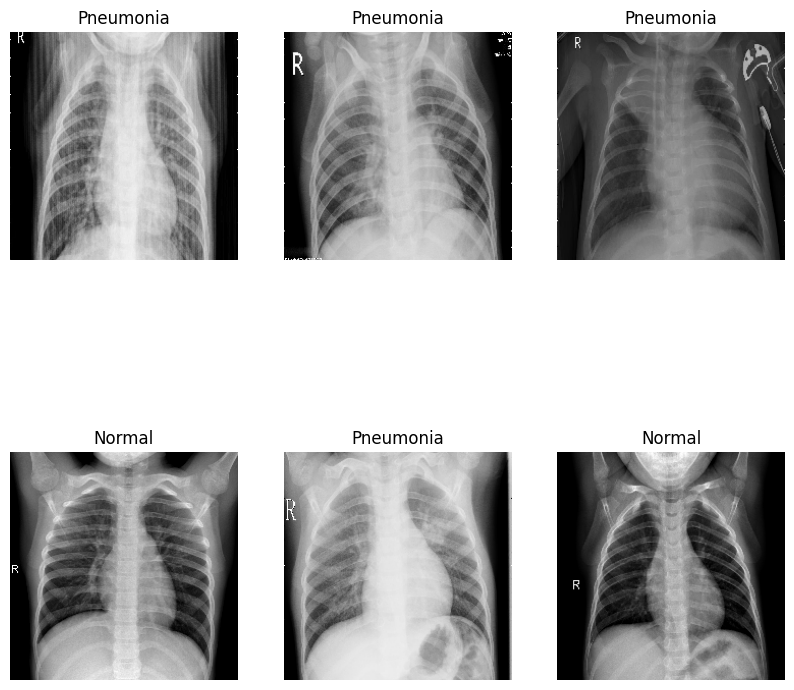

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img

# Define the path to the directory containing the images
image_dir = '/content/data/chest_xray/train'




#This code defines a dictionary class_labels that maps the label values (0 or 1) to more human-readable strings ('Normal' or 'Pneumonia').
#This will be used later to display the correct label for each image.
class_labels = {
    0: 'Normal',
    1: 'Pneumonia'
}



#This code defines a new function find_image_files that recursively searches for image files in a directory and its subdirectories, using the os.walk function.
#It checks whether each file has a valid image file extension ('.jpg', '.jpeg', or '.png') and yields the full path to the file if it does.
def find_image_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                yield os.path.join(root, file)



# Define a function to randomly select and display some images from the directory
def visualize_images(image_dir, num_images=6):

    # Get a list of all the image filenames and labels in the directory
    image_filenames = list(find_image_files(image_dir))
    labels = [int(os.path.basename(os.path.dirname(filename)) == 'PNEUMONIA') for filename in image_filenames]

    # Check that num_images is not greater than the number of images in the directory
    num_images = min(num_images, len(image_filenames))

    # Select a random sample of the image filenames
    selected_indices = np.random.choice(len(image_filenames), size=num_images, replace=False)
    selected_images = [image_filenames[i] for i in selected_indices]
    selected_labels = [labels[i] for i in selected_indices]

    # Plot the selected images with labels
    fig, axs = plt.subplots(2, 3, figsize=(10, 10))
    for i, (image_filename, label) in enumerate(zip(selected_images, selected_labels)):
        row = i // 3
        col = i % 3
        img = load_img(image_filename, target_size=(224, 224))
        axs[row, col].imshow(img, cmap='gray')
        axs[row, col].axis('off')
        axs[row, col].set_title(class_labels[label])
    plt.show()

# Visualize some images from the training set
visualize_images(image_dir)


Some of the images in above, appear to show abnormalities in the lung area, such as increased opacity or the presence of fluid, which could indicate the presence of pneumonia.

# **5. Modeling**




In [ ]:
!pip install -q keras-tuner

## **CNN**

CNNs (Convolutional Neural Networks) are considered to be one of the best model for imagery analysis for several reasons:

CNNs are designed to take advantage of the spatial information present in images. They use convolutional layers that scan the input image with a set of filters to detect different features and patterns. This allows the network to learn and extract relevant features from the images, such as edges, textures, and shapes.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner

# Define the hyperparameters
learning_rate = 0.001
optimizer = 'adam'
num_layers = 2
num_filters = 64
activation = 'relu'

# Define the model builder function
def build_model():
    model = keras.Sequential()
    model.add(layers.Conv2D(num_filters, (3, 3), activation=activation, input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    for i in range(num_layers):
        model.add(layers.Conv2D(num_filters, (3, 3), activation=activation))
        model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation=activation))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the model with the defined hyperparameters
model = build_model()
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=5,
                    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3)])

# Evaluate the model on the test data
# model.evaluate(test_data)


Epoch 1/5
163/163 [==============================] - 130s 705ms/step - loss: 0.4491 - accuracy: 0.8167 - val_loss: 0.9268 - val_accuracy: 0.6250
Epoch 2/5
163/163 [==============================] - 128s 784ms/step - loss: 0.2636 - accuracy: 0.8877 - val_loss: 0.5014 - val_accuracy: 0.7500
Epoch 3/5
163/163 [==============================] - 137s 837ms/step - loss: 0.2343 - accuracy: 0.9068 - val_loss: 0.3588 - val_accuracy: 0.8125
Epoch 4/5
163/163 [==============================] - 121s 742ms/step - loss: 0.2037 - accuracy: 0.9189 - val_loss: 0.6013 - val_accuracy: 0.7500
Epoch 5/5
20/20 [==============================] - 6s 317ms/step - loss: 0.6245 - accuracy: 0.7676


[0.6244708299636841, 0.7676281929016113]

In [ ]:
# Evaluate the model on the train, validation, and test data
train_loss, train_acc = model.evaluate(train_data)
val_loss, val_acc = model.evaluate(val_data)
test_loss, test_acc = model.evaluate(test_data)
print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}')
print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')


20/20 [==============================] - 6s 281ms/step - loss: 0.6245 - accuracy: 0.7676
Train Loss: 0.2015, Train Accuracy: 0.9202
Val Loss: 0.9148, Val Accuracy: 0.7500
Test Loss: 0.6245, Test Accuracy: 0.7676


# Visualize Performance of Best_Model

The confusion matrix is a table that summarizes the number of correct and incorrect predictions for each class. It has dimensions of the number of classes in your dataset by the number of classes. The diagonal elements of the matrix represent the number of correct predictions, and off-diagonal elements represent incorrect predictions.

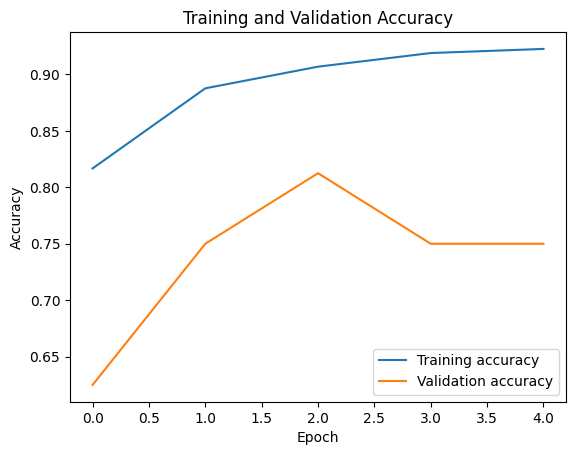

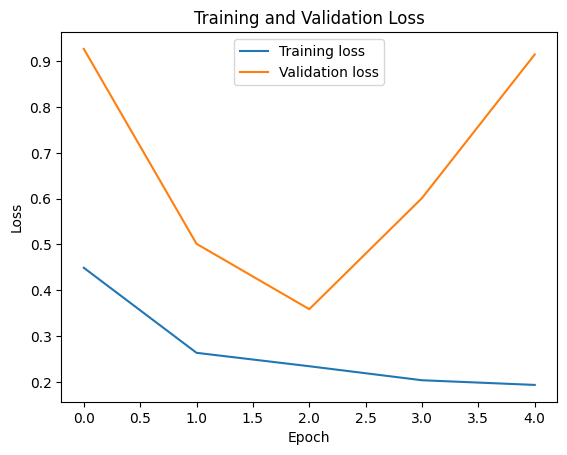

In [ ]:
# Visualize the performance of the best model on training and validation data
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show();



Ideally, we want to see both the training and validation accuracy increase, while the training and validation loss decrease. If the validation accuracy is consistently lower than the training accuracy, it may indicate overfitting, while if both the training and validation accuracy are low, it may indicate underfitting. The loss plots can also help identify these issues and inform decisions on how to improve the model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
y_pred = model.predict(test_data)
y_true = test_data.classes

# Convert predictions from one-hot encoding to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate confusion matrix as a dataframe
cm = pd.DataFrame(confusion_matrix(y_true, y_pred_labels),
                  columns=['Predicted 0', 'Predicted 1'],
                  index=['True 0', 'True 1'])

# Generate classification report as a dataframe
cr = pd.DataFrame(classification_report(y_true, y_pred_labels, output_dict=True)).transpose()

# Print the confusion matrix and classification report dataframes
print('Confusion Matrix:\n', cm)
print('\nClassification Report:\n', cr)


20/20 [==============================] - 6s 276ms/step
Confusion Matrix:
         Predicted 0  Predicted 1
True 0           35          199
True 1           62          328

Classification Report:
               precision    recall  f1-score     support
0              0.360825  0.149573  0.211480  234.000000
1              0.622391  0.841026  0.715376  390.000000
accuracy       0.581731  0.581731  0.581731    0.581731
macro avg      0.491608  0.495299  0.463428  624.000000
weighted avg   0.524304  0.581731  0.526415  624.000000
